In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point ='gym.envs.toy_text:FrozenLakeEnv',
    kwargs ={'map_name':'4x4',
            'is_slippery': False}
)

In [3]:
env = gym.make('FrozenLake-v3')

Q = np.zeros([env.observation_space.n,env.action_space.n]) #Initialize table with all zeros
num_episodes = 200 #set learning parameters

rList=[]
for i in range(num_episodes):
    state=env.reset() #reset environment
    rAll = 0
    done = False
    
    while not done:
        action = rargmax(Q[state,:])
        new_state, reward, done,_ = env.step(action) #get new stse and reward from enviroment
        Q[state,action] = reward + np.max(Q[new_state,:])
        rAll +=reward
        state = new_state
    rList.append(rAll)

Success rate: 0.495
Rinal Q-Table Values
Left Down Right Up
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


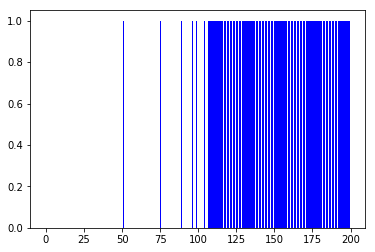

In [4]:
print("Success rate: " +str(sum(rList)/num_episodes))
print("Rinal Q-Table Values")
print("Left Down Right Up")
print(Q)
plt.bar(range(len(rList)),rList,color='blue')
plt.show()